# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Cross sectional Momentum Strategy in Futures Market

In this strategy, we take position on a large number of futures picked out from a future commodity universe. This is to avoid adverse movement in price on the net. 

Studies like the one by [Miffre et al](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=702281) suggest that commodity momentum returns are found to be related to the propensity of commodity futures markets to be in backwardation or contango. The paper concludes that a momentum strategy that consistently trades the most backwarded and contangoed contracts is likely to be profitable. You can, therefore, use the configuration of the term structure or forward curve as a proxy for the momentum a futures contract might have. 


In this notebook, you will perform the following steps:

1. [Read prices from CSV file](#read)
2. [Rank based on future spot ratio](#rank)
3. [Plot future spot ratio](#ratio)
4. [Commodity spot correlation](#corr)
5. [Generate trading signal](#signal) 
6. [Calculate returns](#returns)
7. [Evaluate strategy](#evaluate)
8. [Conclusion](#conclusion)

## Import modules

In [79]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

<a id='read'></a> 
## Import data
In the code below you will import the commodity future and spot data. The data is from the beginning of 2012 to the end of 2019.

The source of the futures data is [yahoo finance](https://in.finance.yahoo.com/) and [investing.com](https://www.investing.com/). The source of the spot data is [NASDAQ](https://www.nasdaq.com/) and [macrotrends.net](https://www.macrotrends.net/).

In [80]:
# Set folder path
path = '../data/'
# Reading the commodity spot data between 2012 and 2020
spot = pd.read_csv(path + 'com_spot_2012_2019.csv',index_col='Date')
# Converting index to datetime format from text
spot.index = pd.to_datetime(spot.index)

In [81]:
# Reading the commodity futures data between 2012 and 2020
future = pd.read_csv(path + 'com_futures_2012_2019.csv',index_col='Date')
# Converting index to datetime format from text
future.index = pd.to_datetime(future.index)

<a id='rank'></a> 
## Rank based on future spot ratio

In the code below you calculate:
1. The futures-spot ratio: this gives a sense of how backwarded or contangoed a contract is. The higher the ratio more contangoed it is as the futures price is higher relative to spot. Similarly, the lower the value more backwarded it is. 

2. You calculate the rank based on the ratio. The more contangoed the commodity future spot pair is the higher the rank. Backwarded commodities have a lower rank. 

In [82]:
# Calculate the ratio
future_spot_ratio = future/spot
# Rank each row which corresponds to each day
rank = future_spot_ratio.rank(axis=1)
# Total number of ranks
total_ranks = rank.shape[1]
# Ranks for the last 5 business days of 2019
rank.tail(5)

,soyabean oil,corn,cocoa,crude oil,cotton,ethanol,feeder cattle,gold,copper,heating oil,...,natural gas,oats,palladium,platinum,rbob,rough rice,soybean,sugar,silver,soyameal
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-26,9.0,15.5,15.5,10.0,15.5,2.0,20.0,24.0,21.0,23.0,...,25.0,15.5,11.0,7.0,4.0,5.0,8.0,15.5,22.0,6.0
2019-12-27,9.0,15.5,15.5,10.0,15.5,4.0,22.0,20.0,21.0,24.0,...,25.0,15.5,11.0,8.0,3.0,6.0,7.0,15.5,23.0,5.0
2019-12-29,8.0,14.5,14.5,10.0,14.5,4.0,22.0,21.0,19.0,24.0,...,25.0,14.5,9.0,20.0,3.0,6.0,7.0,14.5,23.0,5.0
2019-12-30,8.0,15.5,15.5,20.0,15.5,4.0,22.0,21.0,10.0,24.0,...,25.0,15.5,11.0,9.0,3.0,5.0,7.0,15.5,23.0,6.0
2019-12-31,8.0,17.5,17.5,11.0,17.5,5.0,23.0,10.0,12.0,24.0,...,25.0,17.5,13.0,9.0,3.0,6.0,7.0,17.5,22.0,4.0


In [83]:
# Creata a new empty dataframe
ratio_rank = pd.DataFrame()
# Add the future spot ratio as a column
ratio_rank['fut_spot_ratio'] = future_spot_ratio.iloc[-1,:]
# Add the rank as a column
ratio_rank['rank'] = rank.iloc[-1,:]
ratio_rank

,fut_spot_ratio,rank
soyabean oil,0.993662,8.0
corn,1.000000,17.5
cocoa,1.000000,17.5
crude oil,0.998692,11.0
cotton,1.000000,17.5
ethanol,0.987078,5.0
feeder cattle,1.007627,23.0
gold,0.997702,10.0
copper,0.999142,12.0
heating oil,1.012126,24.0


Since the future spot ratio of natural gas is the highest it has the highest rank. It is the lowest for wheat so it has the lowest rank.

<a id='ratio'></a> 
## Plot future spot ratio
In the code below  plot the future spot ratio. Notice the spikes in the data. When do you think the ratio will spike?
The ratio will spike when the contract is either extremely contangoed or backwarded.

This plot can also help us visually identify anomalies or errors in data.

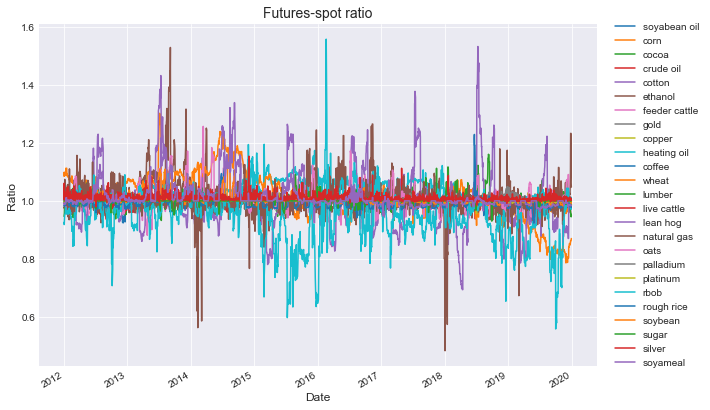

In [86]:
future_spot_ratio.plot(figsize=(10, 7))
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.title("Futures-spot ratio", fontsize=14)
# Define the labels for x-axis and y-axis
plt.xlabel("Date", fontsize=12)
plt.ylabel("Ratio", fontsize=12)
plt.show()

<a id='corr'></a> 
## Commodity spot correlation

In the code, below you plot the correlation between an equal weight portfolio of commodity spots and spot of each commodity. As you can observe majority of the commodity spots have a correlation magnitude less than 0.5.

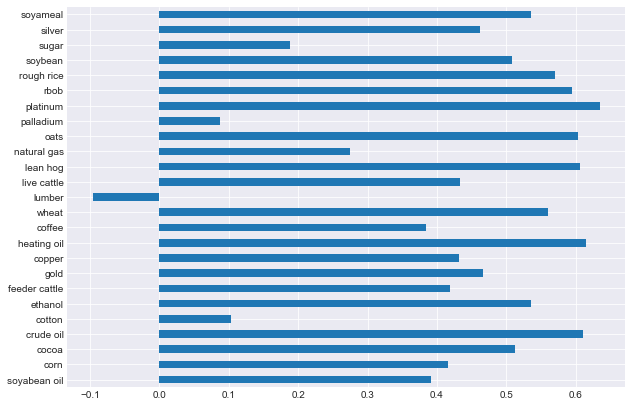

In [87]:
# Set figure size
plt.figure(figsize=(10, 7))
# Finding and plotting the correlation between equal weighted portfolio of commodity spot
# and each commodity spot price
spot.corrwith(spot.mean(axis=1)).plot(kind='barh')
plt.show()

<a id='signal'></a> 
## Generate the trading signal

In the function below, you generate the trading signal based on the rank. As we elaborated in the last unit, you will be taking the commodities of the two upper and two lower deciles for trading. This is for illustration of the strategy. You can choose to take as much as appropriate or optimal. This can be done by decile ratio below being multiplied to the variable total_ranks.

You go short on contracts with the future spot ratio in the bottom two deciles. You simultaneously go long on all contracts who’s future spot ratio is in the top two deciles.

In [88]:
def signal(rank):
        # Go short on all ranks in the upper two deciles
        signal = np.where(rank>total_ranks*8/10,-1,np.nan)
        # Go long on all ranks in the lower two deciles
        signal = np.where(rank<total_ranks*2/10,+1,signal)
        return signal
signal = rank.apply(signal,axis=0)

<a id='returns'></a> 
## Calculate returns

In the code below you set the holding period. The holding period is the number of days you hold your position. After the holding period, you rank the commodities again and take positions in the manner shown above.

Thereafter, you calculate the returns based on the above generated signals.

In [89]:
holding_time = 10 # days
# Calculate futures returns for holding days and shift it back by number of holding days
holding_period_futures_returns = future.pct_change(holding_time).shift(-1*holding_time)
# Calculate futures returns between holding days. This is done by jumping number of holding days.
futures_returns = holding_period_futures_returns[::holding_time] * signal[::holding_time]

## Calculate trading cost

In the code below you calculate the trading cost. The cost gets applied only when the position changes between consecutive trading days. Like for example if the signal goes from 0 (no position) to -1 (sell), the cost for selling will be applied. If the position changes no cost will be applied.

In [90]:
# Trade financing cost
trading_signal = signal[::holding_time]
trading_signal = trading_signal.replace(np.nan,0)
# Trading cost applied when position changed.
cost = (0.001 * np.abs(trading_signal - trading_signal.shift(-1)))

# Applying cost to futures returns
futures_returns = futures_returns - cost

<a id='evaluate'></a> 
## Evaluate the strategy

In the code below, you evaluate the strategy by calculating the cumulative returns, the drawdowns and the sharpe ratio. 

5.22


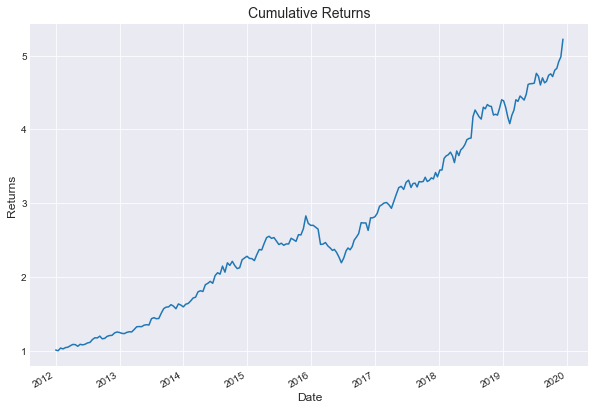

In [91]:
portf_ret = futures_returns.mean(axis=1)
print("%.2f" % (portf_ret+1).prod())
# Set figure size
plt.figure(figsize=(10, 7))
# Define the label for the title of the figure
plt.title("Cumulative Returns", fontsize=14)
# Define the labels for x-axis and y-axis
plt.xlabel("Date", fontsize=12)
plt.ylabel("Returns", fontsize=12)

(portf_ret+1).cumprod().plot()
plt.show()    

The maximum drawdown is -22.49


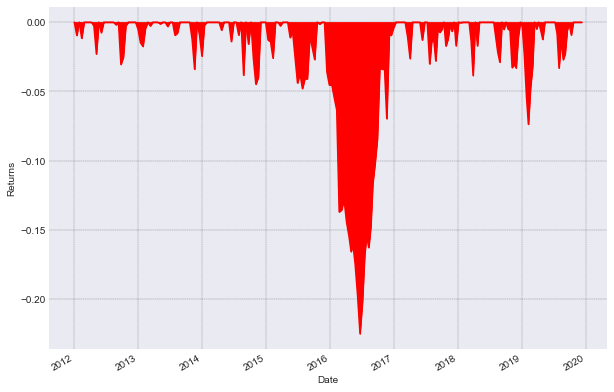

In [92]:
cum_rets = (portf_ret+1).cumprod()
running_max = np.maximum.accumulate(cum_rets.dropna())
# Ensure the value never drops below 1
running_max[running_max < 1] = 1
# Calculate the percentage drawdowns
drawdown = ((cum_rets)/running_max - 1)
max_dd = drawdown.min()*100
print('The maximum drawdown is %.2f' % max_dd)
# Set figure size
plt.figure(figsize=(10, 7))
# Plot drawdowns
drawdown.plot(color='r',figsize=(10,7))
plt.ylabel('Returns')
plt.fill_between(drawdown.index, drawdown, color='red')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()    

As we can see the maximum drawdown is between 2016 and 2017. This is because of the increase in the spot price for a lot of commodities simultaneously in mid-2016. When they increase simultaneously, there is a net spot movement. We expected this net movement to be 0 but it didn't happen. You can read about it [here](https://www.marketwatch.com/story/commodities-are-crushing-it-in-2016-heres-why-2016-06-30). 

In [93]:
# Sharpe ratio
sharpe = (portf_ret.mean()/portf_ret.std())*(252/holding_time)**0.5
print("%.2f" % sharpe)

1.74


<a id='conclusion'></a> 
## Conclusion

The backtest gave us a Sharpe of 1.74. The maximum drawdown was -22.5%. 1 USD invested at the beginning of 2012 would have fetched 5.22 USD by the beginning of 2020. The takeaways are that term structure is a proxy for momentum. Also, using a cross section of futures can help avoid bad results due to adverse spot movement. Here are some of the things you can try next:

1. For the ranks on which you take position change both limits from two deciles to three
2. Try out the double sort strategy which ranks on momentum on roll returns as well as on the futures-spot ratio. You can look at [this](https://onlinelibrary.wiley.com/doi/10.1002/fut.21656) paper by Fuertes et al which elaborates on this method.
3. Remove highly correlated commodities from the universe
